<div style="font-size:40px; color:#0F2080;">
  Importing <span style="color:#F5793A;">libraries</span> and <span style="color:#F5793A;">fits</span>
</div>

In [1]:
import os
import numpy as np
from astropy.io import fits
import matplotlib.pyplot as plt
from pathlib import Path
import glob
import pahfit
from numpy.polynomial import Polynomial
from astropy.io.misc import yaml
from pkg_resources import resource_filename
from pahfit.errors import PAHFITPackError, PAHFITWarning
from warnings import warn
from astropy import units as u
from pahfit.model import Model
from specutils import Spectrum1D
from astropy.nddata import StdDevUncertainty
import importlib_resources
from pypahdb.decomposer import Decomposer
from pypahdb.observation import Observation
import scipy
import matplotlib
import tqdm
from specutils.manipulation import extract_region
from specutils import SpectralRegion
from astropy.table import Table

fits_dir = '/home/juan/Downloads/Research/JWSTPAH'
fits_files = [f for f in os.listdir(fits_dir) if f.endswith('.fits')]

print(f"Found {len(fits_files)} FITS files:")
for file in fits_files:
    print(file)

Found 29 FITS files:
CH3_ring6.fits
CH2_ring7.fits
jw01328-c1006_t014_miri_ch3-shortmediumlong_x1d.fits
CH2_ring3.fits
CH2_ring4.fits
CH2_ring2.fits
CH1_ring2.fits
CH2_ring5.fits
jw01328-c1006_t014_miri_ch3-shortmediumlong_s3d.fits
CH3_ring5.fits
jw01328-c1006_t014_miri_ch1-shortmediumlong_s3d.fits
jw01328-c1006_t014_miri_ch1-shortmediumlong_x1d.fits
CH3_ring2.fits
CH1_ring3.fits
CH3_ring3.fits
CH1_ring6.fits
CH3_ring7.fits
jw01328-c1006_t014_miri_ch2-shortmediumlong_s3d.fits
CH1_ring4.fits
CH3_ring1.fits
CH2_ring6.fits
CH1_ring1.fits
jw01328-c1006_t014_miri_ch2-shortmediumlong_x1d.fits
CH1_ring5.fits
jw01328-c1006_t014_miri_ch4-shortmediumlong_x1d.fits
CH2_ring1.fits
CH3_ring4.fits
jw01328-c1006_t014_miri_ch4-shortmediumlong_s3d.fits
CH1_ring7.fits


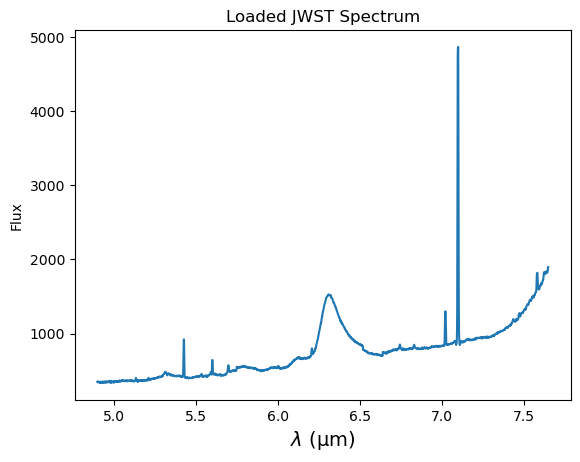

In [3]:
obsjwst = Observation("/home/juan/Downloads/Research/JWSTPAH/jw01328-c1006_t014_miri_ch1-shortmediumlong_x1d.fits")
obsjwst.spectrum.meta["colnames"] = ["Wavelength", "Flux"]
s = obsjwst.spectrum

plt.plot(s.spectral_axis, s.flux[0, 0, :])
plt.xlabel(r'$\lambda$ (μm)', fontsize=14)
plt.ylabel("Flux")
plt.title("Loaded JWST Spectrum")
plt.show()

downloading pre-computed matrix


240MB [02:58, 1.35MB/s] 


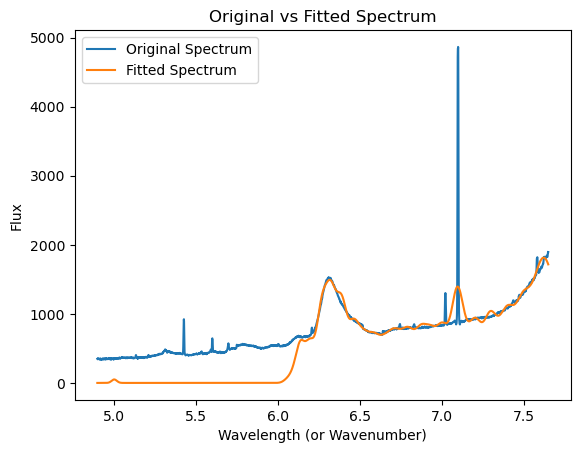

In [4]:
resultjwst = Decomposer(obsjwst.spectrum)

# Extract the fitted spectrum and plot
fitted_spectrum = resultjwst.fit
plt.plot(s.spectral_axis, s.flux[0, 0, :], label="Original Spectrum")
plt.plot(s.spectral_axis, fitted_spectrum[:, 0, 0], label="Fitted Spectrum")
plt.xlabel("Wavelength (or Wavenumber)")
plt.ylabel("Flux")
plt.title("Original vs Fitted Spectrum")
plt.legend()
plt.show()

<div style="font-size:40px; color:#0F2080;">
  Getting the <span style="color:#F5793A;">residual
</div>

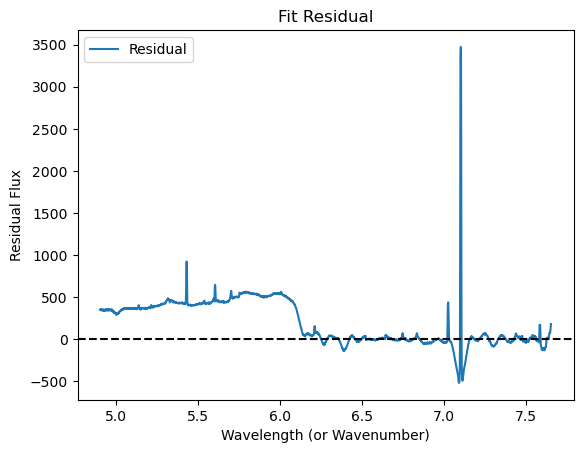

In [5]:
residual = s.flux[0, 0, :] - fitted_spectrum[:, 0, 0]
plt.plot(s.spectral_axis, residual, label="Residual")
plt.xlabel("Wavelength (or Wavenumber)")
plt.ylabel("Residual Flux")
plt.title("Fit Residual")
plt.axhline(0, color="black", linestyle="--")
plt.legend()
plt.show()

<div style="font-size:40px; color:#0F2080;">
  Saving the  <span style="color:#F5793A;">results</span>
</div>

In [6]:
resultjwst.save_pdf("Channel1Ring1.pdf")
#resultjwst.save_fits("JWST_PAH_Fit.fits", header=obs.header)

/home/juan/anaconda3/lib/python3.12/site-packages/astropy/units/quantity.py:671: RuntimeWarning: invalid value encountered in divide
  result = super().__array_ufunc__(function, method, *arrays, **kwargs)
